## Описание проекта

Приоритизирование гипотез для увеличения выручки, анализ результатов A/B-теста.

### Часть 1. Приоритизация гипотез.
В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.
#### Задача
* Примените фреймворк ICE для приоритизации гипотез.Отсортируйте их по убыванию приоритета.
* Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
* Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')

In [3]:
hypothesis.columns = hypothesis.columns.str.lower()

In [4]:
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']).round(1)
hypothesis.sort_values(by='ICE', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.2
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.3
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.2
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.1
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.0


Наиболее перспективные гипотезы по фреймворку ICE - это гипотезы № 8,0,7,6,2

In [5]:
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']).round(1)
hypothesis.sort_values(by='RICE', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.2,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.0,56.0
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.3,40.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.0,40.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.2,16.2
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.1,9.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.0,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.3,4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.0,3.0


Наиболее перспективные гипотезы по фреймворку RICE - это гипотезы № 7,2,0,6,8

#### Вывод
Оба фреймворка выделил 5 одинаковых перспективных гипотез. Гипотеза в ICE была более перспективной, но в RICE при учете ее минимального охвата, опустилась на 5 место. Гипотеза 6 имееи средний охват (5 из 10), но увлеченность (impact) на уровне 3 (из 10). Уверенность оценок (confidence) этих пяти гипотез колеблется на уровне 7-9.

### Часть 2. Анализ A/B-теста
Вы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.
#### Задача
Проанализируйте A/B-тест:
* Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
* Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
* Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
* Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.
* Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.
* Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
* Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
* Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
* Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
* Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.
* Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
* Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.
* Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
* Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

In [6]:
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [7]:
orders.head(2)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B


In [8]:
visitors.head(2)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619


In [9]:
print(orders.duplicated().sum())
print(visitors.duplicated().sum())

0
0


In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [11]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [12]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

#### Выводы
Данные не имеют повторений, столбцы с датами переведены в формат datetime. Пропусков нет.

In [13]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [14]:
datesGroups = orders[['date', 'group']].drop_duplicates()

In [15]:
datesGroups.head()

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


In [16]:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], 
                                                                     orders['group'] == x['group'])]\
                                        .agg({'date':'max', 'group':'max', 'transactionId': pd.Series.nunique, 
                                           'visitorId': pd.Series.nunique, 'revenue':'sum'}),axis=1)\
                                        .sort_values(by=['date', 'group'])

In [17]:
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], 
                                                                         visitors['group'] == x['group'])]\
                  .agg({'date':'max', 'group':'max', 'visitors':'sum'}), axis=1).sort_values(by=['date', 'group'])

In [18]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])

In [19]:
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [20]:
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B']

In [21]:
cumulativeRevenueA.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
2,2019-08-02,A,44,38,242401,1338
4,2019-08-03,A,68,62,354874,1845
6,2019-08-04,A,84,77,425699,2562
8,2019-08-05,A,109,100,549917,3318


#### Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


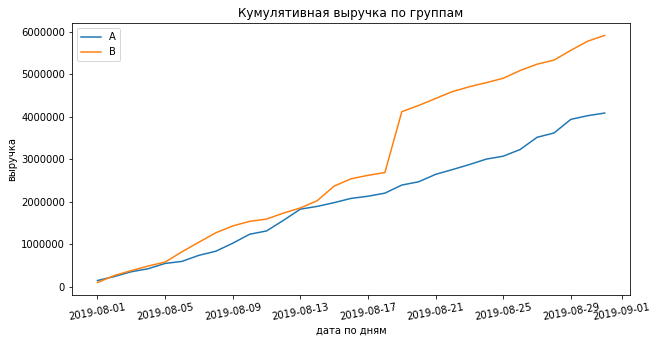

In [22]:
plt.figure(figsize=(10, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.xticks(rotation=10)
plt.title('Кумулятивная выручка по группам')
plt.xlabel('дата по дням')
plt.ylabel('выручка')
plt.legend();

До 2019-08-18 выручка почти равномерно увеличивалась по двум тестам. В этот день клиенты теста В сделали больше покупок, или жто один клиент сделал крупнуб покупку с 2019-08-19 выручка снова увеличивалась равномерно и в тесте А, и в тесте В.

#### Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

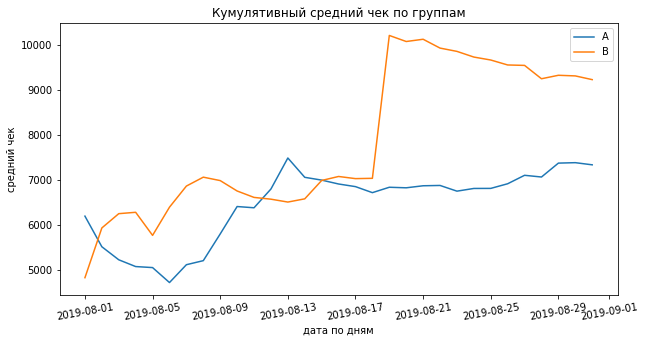

In [23]:
plt.figure(figsize=(10, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'] / cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'] / cumulativeRevenueB['orders'], label='B')
plt.xticks(rotation=10)
plt.title('Кумулятивный средний чек по группам')
plt.xlabel('дата по дням')
plt.ylabel('средний чек')
plt.legend();

Кумулятивный средний чек для группы В до крупной покупки 2019-08-18 устоялся в районе 6000-7000. Крупная покупка сильно подняла средний чек группы теста В. После этой покупку средний чек начал опускаться, и, предположу, если тест длился дольше, то средний чек приблизился бы к среднему чеку группы А. Средний чек группы А принимает значения в районе 7000. 

#### Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

In [24]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', 
                                                   how='left', suffixes=['A', 'B'])

In [25]:
mergedCumulativeRevenue.head()

,date,groupA,ordersA,buyersA,revenueA,visitorsA,groupB,ordersB,buyersB,revenueB,visitorsB
0,2019-08-01,A,24,20,148579,719,B,21,20,101217,713
1,2019-08-02,A,44,38,242401,1338,B,45,43,266748,1294
2,2019-08-03,A,68,62,354874,1845,B,61,59,380996,1803
3,2019-08-04,A,84,77,425699,2562,B,78,75,489567,2573
4,2019-08-05,A,109,100,549917,3318,B,101,98,581995,3280


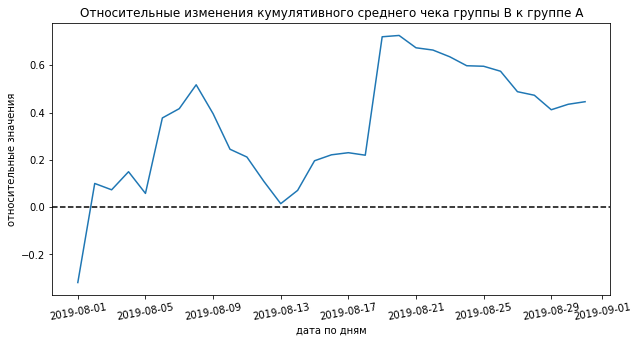

In [26]:
plt.figure(figsize=(10,5))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/ 
        (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersB'])-1)
plt.axhline(0, linestyle='--', color='black')
plt.xticks(rotation=10)
plt.title('Относительные изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('дата по дням')
plt.ylabel('относительные значения');

Относительный средний чек скачет, возможно это из-за выбросов.

#### Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.

In [27]:
cumulativeData['conversion'] = cumulativeData['orders'] / cumulativeData['visitors']

In [28]:
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

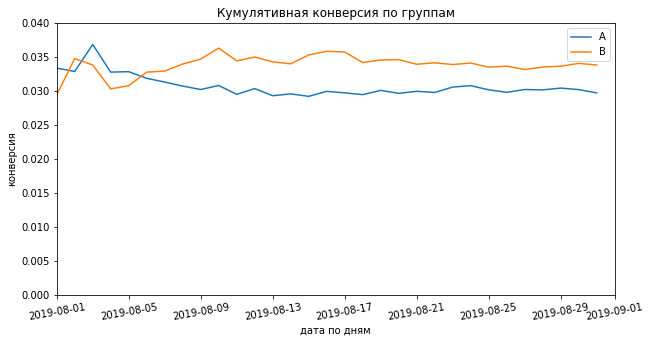

In [29]:
plt.figure(figsize=(10, 5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.xticks(rotation=10)
plt.title('Кумулятивная конверсия по группам')
plt.xlabel('дата по дням')
plt.ylabel('конверсия')
plt.legend()
plt.axis(["2019-08-01", '2019-09-01', 0, 0.04]);

Кумулятивная конверсия группы В на пол процента больше.

#### Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.

In [30]:
mergedCumulativeConversion = cumulativeDataA[['date', 'conversion']].merge(cumulativeDataB[['date', 'conversion']], 
                                                                            left_on='date', right_on='date', how='left', 
                                                                            suffixes=['A','B'])

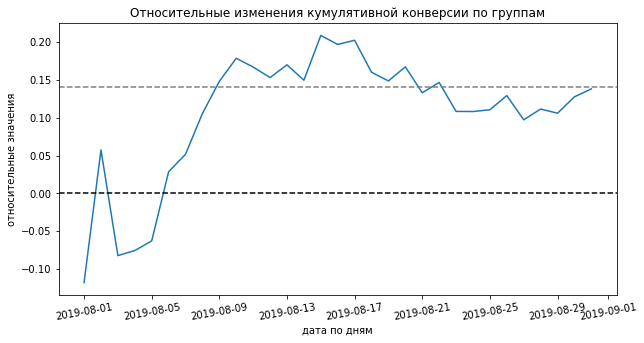

In [31]:
plt.figure(figsize=(10, 5))
plt.plot(mergedCumulativeConversion['date'], 
         mergedCumulativeConversion['conversionB']/mergedCumulativeConversion['conversionA']-1)
plt.xticks(rotation=10)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.14, color='grey', linestyle='--')
plt.title('Относительные изменения кумулятивной конверсии по группам')
plt.xlabel('дата по дням')
plt.ylabel('относительные значения');

Вначале теста конверсия группы B была меньше группы А. После колебаний вначале теста конверсия группы B была выше группы А, но продолжается колебаться и нужно увеличить период теста.

#### Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

In [32]:
ordersByUsers = orders.drop(['date', 'revenue', 'group'], axis=1).groupby('visitorId', as_index=False)\
                        .agg({'transactionId':pd.Series.nunique})
ordersByUsers.columns = ['visitorId', 'transactions']

In [33]:
x_values = pd.Series(range(0, len(ordersByUsers)))

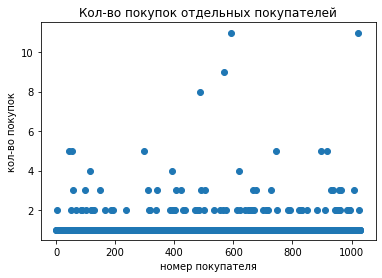

In [34]:
plt.scatter(x_values, ordersByUsers['transactions'])
plt.title('Кол-во покупок отдельных покупателей')
plt.xlabel('номер покупателя')
plt.ylabel('кол-во покупок');

Большинство сделало только один заказ, но доля с 2-3 заказами тоже не мала.

#### Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [35]:
np.percentile(ordersByUsers['transactions'], [95,99])

array([2., 4.])

Не более 5 % пользователей сделали более двух заказов. Приму, что пользователь сделавший более 2 заказов это аномалия

#### Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

In [36]:
x_values = pd.Series(range(0, len(orders['revenue'])))

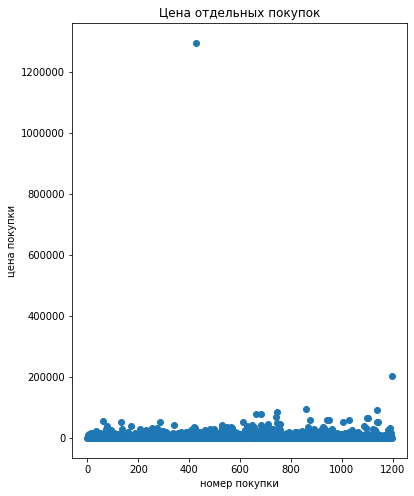

In [37]:
plt.figure(figsize=(6,8))
plt.title('Цена отдельных покупок')
plt.xlabel('номер покупки')
plt.ylabel('цена покупки')
plt.scatter(x_values, orders['revenue'])

(0, 100000)

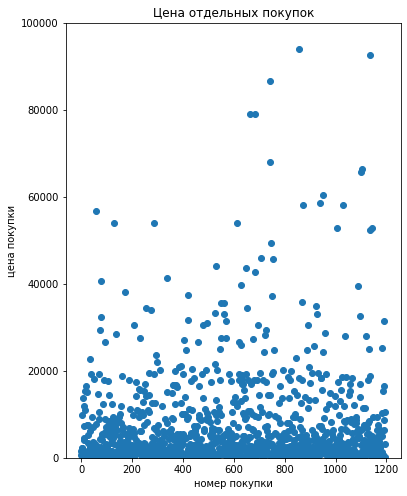

In [38]:
plt.figure(figsize=(6,8))
plt.scatter(x_values, orders['revenue'])
plt.title('Цена отдельных покупок')
plt.xlabel('номер покупки')
plt.ylabel('цена покупки')
plt.ylim(0, 100000)

Большинство заказов в пределах 100 тыс. Две покупки сразу выделяются от остальных заказов: 200 тыс. и 1200 тыс.
Граница аномальных заказов предположительно лежит между 20000 и 30000.

#### Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [39]:
np.percentile(orders['revenue'], [95,99])

array([28000. , 58233.2])

Выберу 28000 единиц за границу аномалий. Не более 5 % заказов стоили дороже 28000 единиц.

#### Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.

In [40]:
orders.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [41]:
visitors.head(2)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619


In [42]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

In [43]:
visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]\
                                            .agg({'date':'max', 'visitorsPerDateA':'sum'}), axis=1)
visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]\
                                            .agg({'date': 'max', 'visitorsPerDateB':'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsACummulative']
visitorsBCummulative.columns = ['date', 'visitorsBCummulative']

In [44]:
ordersADaily = orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]\
                .groupby('date', as_index=False).agg({'transactionId': pd.Series.nunique, 'revenue':'sum'})
ordersBDaily = orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]\
                .groupby('date', as_index=False).agg({'transactionId': pd.Series.nunique, 'revenue':'sum'})

ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

In [45]:
ordersACummulative = ordersADaily.apply(lambda x: ordersADaily[ordersADaily['date'] <= x['date']]\
                                        .agg({'date':'max', 'ordersPerDateA':'sum', 'revenuePerDateA':'sum'}), axis=1)\
                                        .sort_values(by='date')
ordersBCummulative = ordersBDaily.apply(lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']]\
                                        .agg({'date':'max', 'ordersPerDateB':'sum', 'revenuePerDateB':'sum'}), axis=1)\
                                        .sort_values(by='date')
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

In [46]:
data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
                   .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
                   .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
                   .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
                   .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
                   .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
                   .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')

In [47]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId':pd.Series.nunique})
ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId':pd.Series.nunique})

ordersByUsersA.columns = ['visitorId', 'orders']
ordersByUsersB.columns = ['visitorId', 'orders']

In [48]:
sampleA = pd.concat([ordersByUsersA['orders'], pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum()-
                                                                len(ordersByUsersA['orders'])), name='orders')], axis=0)
sampleB = pd.concat([ordersByUsersB['orders'], pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum()-
                                                                len(ordersByUsersB['orders'])), name='orders')], axis=0)

In [49]:
print("p-value = {0:.4f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

p-value = 0.0084


In [50]:
(sampleB.mean()/sampleA.mean()-1).round(3)

0.138

#### Гипотезы сформулированы следующим образом:
* Н0: Конверсии группы А и В равны.
* Н1: Конверсия группа А и В не равны.

* По 'сырым' данным p-value = 0.0084 < 0.05, отвергаем нулевую гипотезу о том, что конверсия группы В и А равны.
* Относительный выигрыш группы В равен 13.8%

#### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

In [51]:
print("p-value = {0:.4f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                                              orders[orders['group']=='B']['revenue'])[1]))

p-value = 0.3646


In [52]:
orders[orders['group']=='B']['revenue'].mean() / orders[orders['group']=='A']['revenue'].mean() - 1

0.2587136699126005

#### Гипотезы сформулированы следующим образом:
* Н0: Средние чеки группы А и В равны.
* Н1: Средние чеки группа А и В не равны.

* p-value = 0.3646 > 0.005, значит отвергать нулевую гипотезу о том, что средние чеки не различаются, нет причин.
* Но по "сырым" данным средний чек группы В на 25% больше среднего чека группы А.

#### Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.

In [53]:
usersWitManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'], 
                                ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId']], axis=0)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']

In [54]:
abnormalUsers = pd.concat([usersWitManyOrders, usersWithExpensiveOrders], axis=0).drop_duplicates().sort_values()

In [55]:
abnormalUsers.head()

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: visitorId, dtype: int64

In [56]:
abnormalUsers.shape

(74,)

In [57]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],
                             pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),
                                       name='orders')], axis=0)
sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'],
                            pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), 
                                      name='orders')], axis=0)

In [58]:
'p-value = {0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1])

'p-value = 0.007'

In [59]:
(sampleBFiltered.mean() / sampleAFiltered.mean() - 1).round(3)

0.173

* p-value = 0.007 < 0.05. По 'очищенным' данным тоже отвергаем нулевую гипотезу о равенстве конверсий обеих групп.
* Но конверсия группы В увеличилась относительно группы А и стала 17.3%.

#### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

In [60]:
'p-value = {0:.4f}'.format(stats.mannwhitneyu(orders[np.logical_and(orders['group']=='A', 
                                                     np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
                                              orders[np.logical_and(orders['group']=='B', 
                                                     np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1])

'p-value = 0.3692'

In [61]:
(
orders[np.logical_and(orders['group']=='B', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() / 
orders[np.logical_and(orders['group']=='A', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1
).round(3)

-0.02

* p-value = 0.3692 > 0.005, значит отвергать нулевую гипотезу о том, что средние чеки не различаются, нет причин. 
* По "очищенным" данным средний чек группы В на 2% меньше среднего чека группы А. Но по сырым превышал на 25%.

#### Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

Результаты А/В теста показали, что:
- есть статистически значимые различия по конверсии между группами и по «сырым», и по данным после фильтрации аномалий. Конверсия группы В лучше на 14-18%, чем группы А.  
- нет статистические различия по среднему чеку между группами по «сырым», по данным после фильтрации аномалий. Стоит отметить, что по сырым данным средний чек группы В был на 25 больше, а по отфильтрованным данным группа В проигрывала 2% в среднем чеке.
- График различия конверсии между группами сообщает, что результаты группы B лучше группы A.
- График различия среднего чека говорит о том, что результаты группы B лучше, но график строили по сырым данным и при очищении данных средний чек группы В стал меньше среднего чека группы А.

Считаю, что так как конверсия группы В больше на 14-17% процентов, предлагаю остановить тест и далее использовать группу В. При примерно одинаковых средних чеках, группа В с большей конверсией будет приносить доход больше.